In [1]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable)
import socket
print(socket.gethostname())
import os
os.chdir("/home/icb/alioguz.can/projects/campa_pt")

/home/icb/alioguz.can/miniconda3/envs/campa/bin/python
gpusrv55.scidom.de


In [2]:
from pathlib import Path
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
TF_ENABLE_ONEDNN_OPTS=0

In [3]:
from campa.tl import (
    Cluster,
    Estimator,
    TorchEstimator,
    Predictor,
    TorchPredictor,
    Experiment,
    TorchExperiment,
    ModelComparator,
    run_experiments,
    run_torch_experiments
)

2025-01-24 08:35:16.356421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-24 08:36:14.369714: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-01-24 08:36:14.384916: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2025-01-24 08:36:14.384945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [4]:
from campa.data import MPPData
from campa.utils import init_logging
from campa.constants import campa_config

In [5]:
# init logging with level INFO=20, WARNING=30
init_logging(level=30)
# read correct campa_config -- created with setup.ipynb
CAMPA_DIR = Path.cwd()
campa_config.config_fname = CAMPA_DIR / "notebooks/params/campa.ini"
print(campa_config)

Reading config from /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini
CAMPAConfig (fname: /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini)
EXPERIMENT_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments
BASE_DATA_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_data
CO_OCC_CHUNK_SIZE: 10000000.0
data_config/exampledata: /home/icb/alioguz.can/projects/campa_pt/notebooks/params/ExampleData_constants.py



In [4]:
import tensorflow as tf
from tensorflow.keras import backend as K
import torch
torch.cuda.empty_cache()
# Clear the current session
K.clear_session()

# Optionally, reset the default graph
tf.compat.v1.reset_default_graph()

2025-01-23 22:11:10.703518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-23 22:18:29.521327: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-01-23 22:18:29.538052: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2025-01-23 22:18:29.538078: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

TF

In [45]:
# get Experiments from config
exps = Experiment.get_experiments_from_config("notebooks/params/example_experiment_params.py")
run_experiments(exps, mode="trainval")

Running experiment for ['VAE', 'CondVAE_pert-CC', 'MPPleiden'] with mode trainval
Training model for VAE


2025-01-24 09:17:18.043430: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-01-24 09:17:18.161694: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2025-01-24 09:17:18.739401: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2
4/4 [==============================] - 7s 157ms/step - loss: 5509.6938 - decoder_loss: 5509.6758 - latent_loss: 0.0187 - decoder_mean_squared_error: 0.8484 - latent_kl_loss: 0.0191 - val_loss: 5445.4497 - val_decoder_loss: 5445.4229 - val_latent_loss: 0.0270 - val_decoder_mean_squared_error: 0.7916 - val_latent_kl_loss: 0.0270
Epoch 2/2
4/4 [==============================] - 0s 13ms/step - loss: 5360.5938 - decoder_loss: 5360.5571 - latent_loss: 0.0367 - decoder_mean_squared_error: 0.7871 - latent_kl_loss: 0.0371 - val_loss: 5308.1104 - val_decoder_loss: 5308.0566 - val_latent_loss: 0.0535 - val_decoder_mean_squared_error: 0.7413 - val_latent_kl_loss: 0.0535
Evaluating model for VAE
319/319 [==============================] - 0s 1ms/step
Clustering results for VAE


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Training model for CondVAE_pert-CC
Epoch 1/2
4/4 [==============================] - 3s 120ms/step - loss: 5248.5215 - decoder_loss: 5248.4824 - latent_loss: 0.0396 - decoder_mean_squared_error: 0.7476 - latent_kl_loss: 0.0392 - val_loss: 5167.5083 - val_decoder_loss: 5167.4668 - val_latent_loss: 0.0413 - val_decoder_mean_squared_error: 0.6931 - val_latent_kl_loss: 0.0413
Epoch 2/2
4/4 [==============================] - 0s 14ms/step - loss: 5074.9121 - decoder_loss: 5074.8721 - latent_loss: 0.0398 - decoder_mean_squared_error: 0.6870 - latent_kl_loss: 0.0400 - val_loss: 4862.1333 - val_decoder_loss: 4862.0742 - val_latent_loss: 0.0593 - val_decoder_mean_squared_error: 0.5989 - val_latent_kl_loss: 0.0593
Evaluating model for CondVAE_pert-CC
319/319 [==============================] - 0s 2ms/step
Clustering results for CondVAE_p

MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Clustering results for MPPleiden
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/MPPleiden/results_epoch000/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp', 'conditions', 'labels', 'clustering'].


In [ ]:
exp = exps[1]
print("Experiment name:", exp.name)
print("Experiment is stored in:", exp.full_path)

In [ ]:
print(Estimator(exps[0]).model.summary)

In [ ]:
est = Estimator(exps[1])
_ = est.train_model()
pred_torch = Predictor(exps[1])
pred_torch.evaluate_model()
cl = Cluster.from_exp_split(exps[1])
cl.create_clustering()

Torch

In [56]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")
print("Experiment name:", torch_exps[0].name)
print("Experiment is stored in:", torch_exps[0].full_path)

Experiment name: VAE
Experiment is stored in: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE


In [7]:
est_torch = TorchEstimator(torch_exps[0])
print(est_torch.model)
est_torch.model.total_trainable_params()

VAEModelTorch(
  (encoder): Sequential(
    (0): Conv2d(34, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=288, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=16, bias=True)
    (6): ReLU()
  )
  (latent): Linear(in_features=16, out_features=32, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=34, bias=True)
  )
)
12018


In [ ]:
est_torch.train_model()
pred_torch = TorchPredictor(torch_exps[1])
pred_torch.evaluate_model()

In [ ]:
results_folder = os.path.join(pred_torch.exp.full_path, f"results_epoch{pred_torch.est.epoch:03d}")
print("Results folder", results_folder)
print(os.listdir(results_folder))

In [9]:
cl = Cluster.from_exp_split(torch_exps[0])

In [12]:
print(cl.config["leiden_resolution"])
cl.create_clustering()

0.2


In [77]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")

In [78]:
run_torch_experiments(torch_exps, mode="trainval")

Running experiment for ['VAE', 'CondVAE_pert-CC', 'MPPleiden'] with mode trainval
Training model for VAE


Epochs: 100%|██████████| 2/2 [00:00<00:00, 39.01it/s]


Evaluating model for VAE
Clustering results for VAE
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Training model for CondVAE_pert-CC


Epochs: 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]
/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.est.model.encoder(torch.tensor(x)) # because mpp has shape batch_size x neighbors x neighbors x channels


Evaluating model for CondVAE_pert-CC


/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.est.model.encoder(torch.tensor(x)) # because mpp has shape batch_size x neighbors x neighbors x channels


Clustering results for CondVAE_pert-CC
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Clustering results for MPPleiden
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp', 'conditions', 'labels', 'clustering'].


In [61]:
# get saved experiments from dir
exps = Experiment.get_experiments_from_dir("torch_test")
comp = ModelComparator(exps)

Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val_imgs/clustering.npy


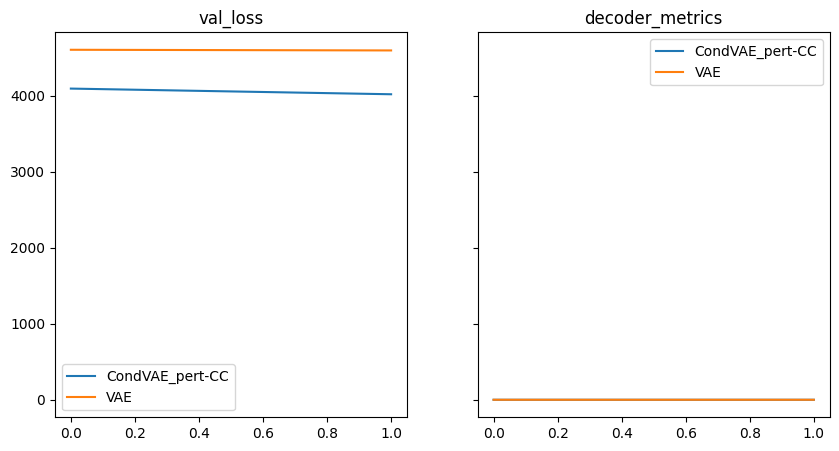

In [82]:
comp.plot_history(values=["val_loss", "decoder_metrics"])
# comp.plot_final_score(score="val_decoder_loss", fallback_score="val_loss", save_prefix="decoder_loss_")
# comp.plot_per_channel_mse()

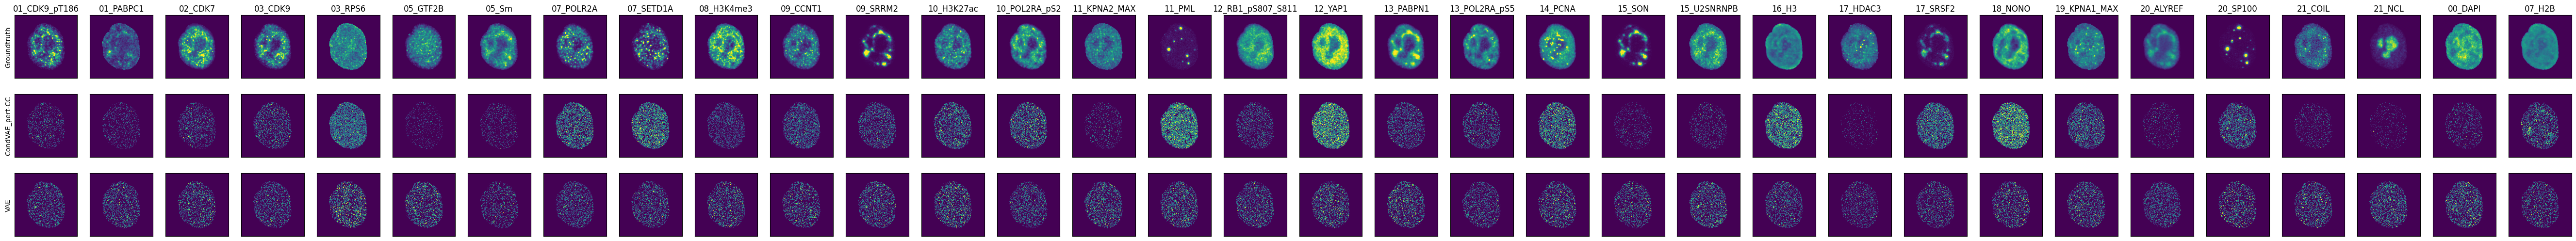

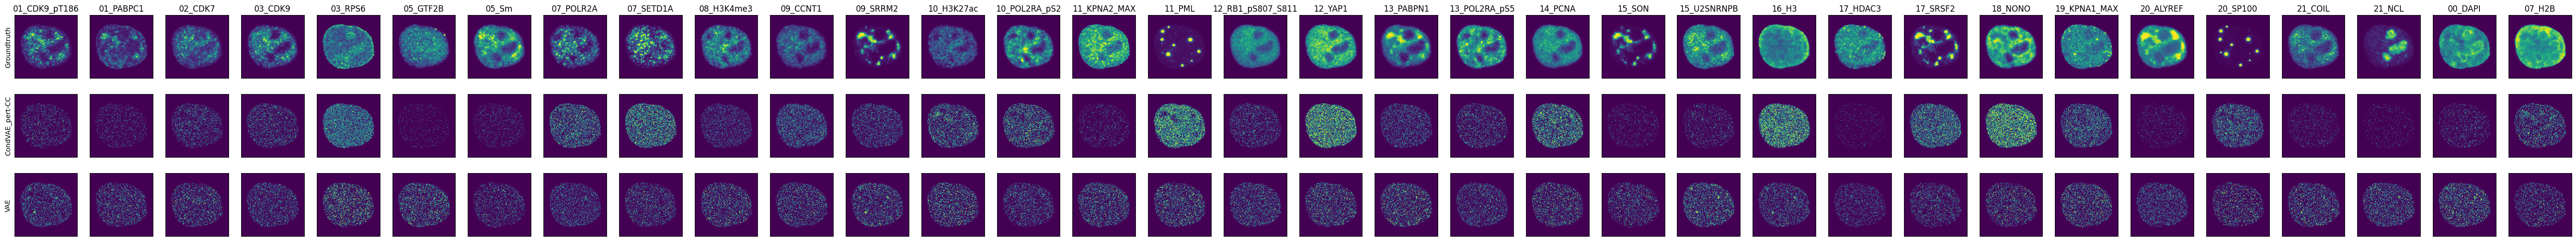

In [42]:
comp.plot_predicted_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)

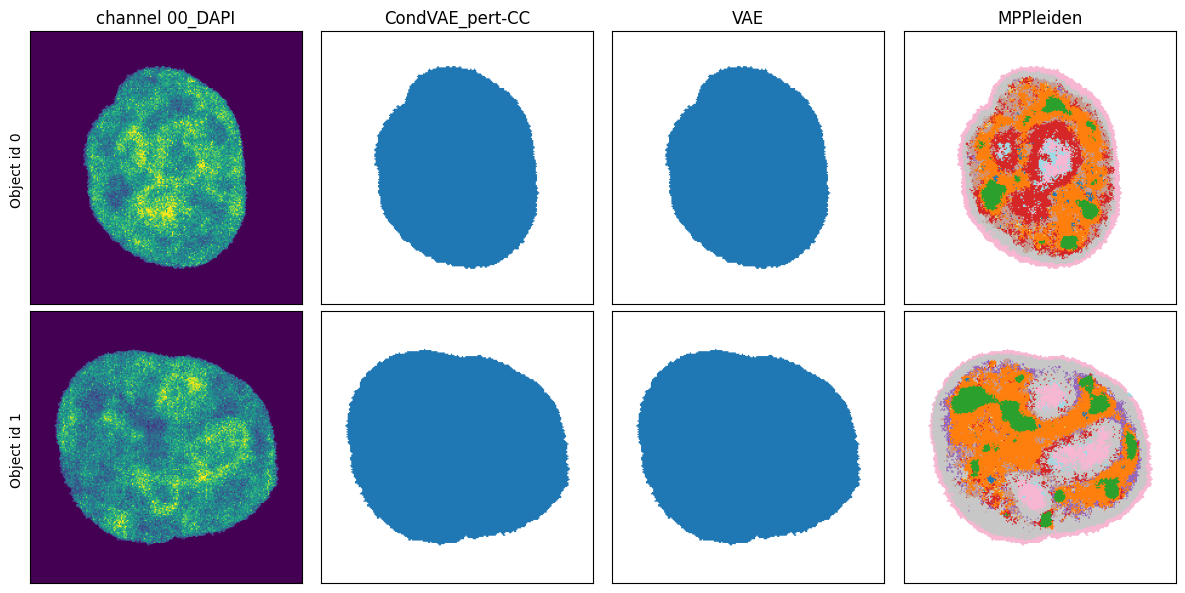

In [43]:
comp.plot_cluster_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
    img_channel="00_DAPI",
)

In [ ]:
mpp_data = MPPData.from_data_dir("/home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val_imgs", data_config="ExampleData", optional_keys=["decoder", "latent"])
print(mpp_data)
print("latent: ",mpp_data.data("latent").shape)
print("decoder: ",mpp_data.data("decoder").shape)